# 5. Random Forest Regression

Let's now build a random forest regression model.

### Load the modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn import metrics

### Load dataset

In [2]:
# Read in dataset
devon_cornwall_lsoa = pd.read_csv('./data/dandc_crime_and_demographics.csv')
# Drop LSOA code
devon_cornwall = devon_cornwall_lsoa.drop('lsoa_code', axis=1)
# Make data float type
devon_cornwall = devon_cornwall.astype(float)

## Total crime
Let's first build a random forest regression model for predicting total crime.

### Divide into features (X) and labels (y)
We will split into features (X) and labels (y) and convert these from pandas dataframes to NumPy arrays. These are simpler to refer to by row/column index numbers, which we will use for sklearn's k-fold method.

In [3]:
# Split data into two dataframes
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['crime_total'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

### Build random forest model

Let's define a function to build an initial random forest model so we can use it for other crime types.

In [4]:
# Define function for fitting initial random forest regression model
def initial_rf_regression(X,y):
    # Set up lists to hold results for each k-fold run
    training_error_results = []
    test_error_results = []
    training_r2_results = []
    test_r2_results = []
    # Set up DataFrame for feature importances
    importances = pd.DataFrame(index = list(X_df))
    # Set up splits
    number_of_splits = 10
    seed = 42
    kf = KFold(n_splits = number_of_splits, shuffle = True, random_state = seed)
    kf.get_n_splits(X, y)
    # Loop through the k-fold splits
    k_fold_count = 1
    for train_index, test_index in kf.split(X, y):
    
        # Get X and Y train/test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]     
        # Set up and fit model
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train, y_train) 
        # Predict training and test set labels
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        # Calculate RMSE and R squared of training and test sets
        error_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        error_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)) 
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        # Add to lists
        training_error_results.append(error_train)
        test_error_results.append(error_test)
        training_r2_results.append(r2_train)
        test_r2_results.append(r2_test)
        
        # Record feature importances
        col_title = 'split_' + str(k_fold_count)
        importances[col_title] = model.feature_importances_
        k_fold_count +=1
        
    # Calculate mean training and test errors and R squared
    mean_training = np.mean(training_error_results)
    mean_test = np.mean(test_error_results)
    mean_training_r2 = np.mean(training_r2_results)
    mean_test_r2 = np.mean(test_r2_results)
    
    # Get average of feature importances, and sort
    importances['mean'] = importances.mean(axis=1)
    importances.sort_values(by='mean',ascending=False, inplace=True)
    
    # Return mean and test errors and importances
    return mean_training, mean_test, mean_training_r2, mean_test_r2, importances

In [5]:
initial = initial_rf_regression(X,y)

Let's have a look at the mean training and test RMSEs.

In [6]:
initial[0:2]

(129.30692934567116, 315.63239530236274)

And the mean training and test R squared values:

In [7]:
initial[2:4]

(0.9481925686392281, 0.6427635105464853)

And the top features ordered by importance:

In [8]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars           0.349586  0.178458  0.303910  0.235073  0.335152   
flat                    0.141413  0.127816  0.115914  0.186442  0.067877   
room_rating             0.052324  0.226758  0.112417  0.130709  0.105605   
married                 0.063097  0.049343  0.035030  0.042789  0.059691   
owners                  0.035529  0.059915  0.047733  0.028973  0.037448   
full_time               0.013906  0.002998  0.014747  0.015567  0.016297   
part_time               0.012335  0.001954  0.022335  0.009794  0.007284   
m_29                    0.002608  0.000850  0.005780  0.009992  0.006677   
employment_score        0.006404  0.005616  0.005136  0.004398  0.005385   
alternative_transport   0.005278  0.001568  0.005042  0.004074  0.004376   
m_51                    0.004979  0.002838  0.008047  0.005184  0.003485   
geographical_barriers   0.007727  0.003051  0.004462  0.003493  0.003086   
health_score            0.003755  0.005057  0.003617  0.004081  0.001781   
m_27                    0.002735  0.001260  0.008191  0.003866  0.002744   
f_57                    0.005940  0.007255  0.002302  0.003955  0.003864   
idaopi                  0.003755  0.003908  0.008904  0.005025  0.002517   
m_30                    0.000446  0.000216  0.007596  0.003168  0.009088   
m_all_ages              0.003984  0.010341  0.005187  0.002634  0.002249   
f_69                    0.009034  0.002228  0.004067  0.001702  0.005590   
m_25                    0.004480  0.002037  0.002054  0.006228  0.002913   
m_61                    0.003698  0.000225  0.002332  0.007841  0.003509   
british_birth           0.000973  0.002374  0.001760  0.002066  0.002254   
hospitality             0.003630  0.003103  0.004447  0.003581  0.000163   
single                  0.003563  0.003980  0.005303  0.005317  0.003117   
m_33                    0.002447  0.003592  0.005232  0.001879  0.003586   
non_dependent_children  0.002590  0.003774  0.008090  0.001122  0.001480   
private_transport       0.001852  0.001107  0.004747  0.002554  0.003679   
m_73                    0.004586  0.007154  0.004674  0.000425  0.000994   
2018_population         0.004918  0.004510  0.002132  0.002415  0.003002   
education_score         0.003567  0.004489  0.001044  0.007216  0.003136   

                         split_6   split_7   split_8   split_9  split_10  \
two_plus_cars           0.346504  0.257122  0.279869  0.310494  0.304735   
flat                    0.141136  0.195746  0.136544  0.134104  0.123031   
room_rating             0.062095  0.082872  0.097938  0.075352  0.120181   
married                 0.049186  0.061503  0.059343  0.046899  0.053300   
owners                  0.039031  0.031122  0.036895  0.042403  0.022734   
full_time               0.006508  0.018400  0.017853  0.007156  0.016501   
part_time               0.012030  0.006215  0.011563  0.002483  0.014340   
m_29                    0.006098  0.008425  0.004713  0.011782  0.004288   
employment_score        0.005159  0.004006  0.006957  0.004656  0.007799   
alternative_transport   0.003496  0.004987  0.006138  0.014289  0.005450   
m_51                    0.005005  0.005150  0.004970  0.006025  0.003568   
geographical_barriers   0.008706  0.004762  0.003179  0.004753  0.005769   
health_score            0.005416  0.003787  0.006038  0.007086  0.008009   
m_27                    0.002113  0.010099  0.008388  0.002307  0.005388   
f_57                    0.006863  0.004699  0.005005  0.003195  0.000629   
idaopi                  0.002587  0.003443  0.003580  0.002248  0.006233   
m_30                    0.002603  0.004279  0.005372  0.003576  0.005284   
m_all_ages              0.002784  0.002632  0.001533  0.005760  0.002549   
f_69                    0.003143  0.002564  0.002128  0.006720  0.002271   
m_25                    0.005459  0.006312  0.003317  0.005001  0.000734   
m_61                    0.000459  0.004316  0.000670  0.003011  0.010061

The mean test and training RMSEs are already better than our initial linear regression model, but let's see if we can optimise the random forest parameters using a random search. Before we do this however, we will need to do some feature selection, as 256 features is a lot to run through the random search. Let's visualise the effect of different numbers of features.

### Feature selection

In [9]:
# Create list of ordered features
ordered_features = initial[4].index.values.tolist()
# Create list to store errors
error_by_feature_number = []
r2_by_feature_number = []
# Loop through feature list
number_of_features = len(ordered_features)
for i in range(number_of_features):
    
    features_to_use = ordered_features[0:i+1]
    X_selected = X_df[features_to_use]   
    # Convert dataframes to NumPy arrays
    X_np = X_selected.to_numpy()
    y_np = y_df.to_numpy()  
    # Run k fold model
    # Set up list to hold results for each k-fold run
    test_error_results = []
    test_r2_results = []
    # Set up splits
    number_of_splits = 10
    seed = 42
    kf = KFold(n_splits = number_of_splits, shuffle = True, random_state = seed)
    kf.get_n_splits(X_np, y_df)
    # Loop through the k-fold splits
    k_fold_count = 0
    for train_index, test_index in kf.split(X_np, y_np):
        
        # Get X and Y train/test
        X_train, X_test = X_np[train_index], X_np[test_index]
        y_train, y_test = y_df[train_index], y_df[test_index]
        # Set up and fit model
        model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train,y_train)
        # Predict test set labels
        y_pred_test = model.predict(X_test)       
        # Calculate RMSE and R squared of test sets
        error_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        r2_test = r2_score(y_test, y_pred_test)
        # Add to lists
        test_error_results.append(error_test)
        test_r2_results.append(r2_test)
        k_fold_count +=1
        
    # Add mean error and R squared to record by feature number
    error_by_feature_number.append(np.mean(test_error_results))
    r2_by_feature_number.append(np.mean(test_r2_results))

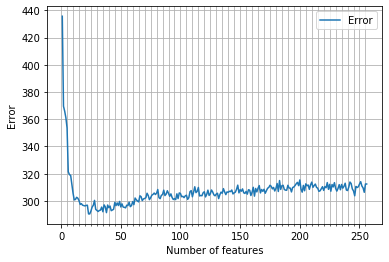

In [10]:
# Draw plot of error by number of features
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

chart_x = list(range(1, number_of_features + 1))

plt.plot(chart_x, error_by_feature_number,
        label = 'Error')

plt.xlabel('Number of features')
plt.ylabel('Error')
plt.legend()


# Major ticks every 20, minor ticks every 5
major_ticks = np.arange(0, 260, 50)
minor_ticks = np.arange(0, 260, 5)

ax.set_xticks(major_ticks)
ax.set_xticks(minor_ticks, minor=True)

# And a corresponding grid
plt.grid(which='both')

plt.show()

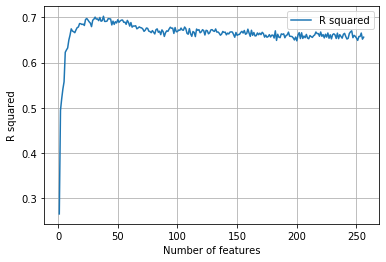

In [11]:
# Draw plot of R squared by number of features
%matplotlib inline

chart_x = list(range(1, number_of_features + 1))

plt.plot(chart_x, r2_by_feature_number,
        label = 'R squared')

plt.xlabel('Number of features')
plt.ylabel('R squared')
plt.legend()
plt.grid(True)

plt.show()

The graphs suggest that we might do well to try 30 features. 

### Random search

In [12]:
# Define function to select top 30 features
def top_30_features(initial):
    top_features = initial[4].index.values.tolist()[0:30]
    return top_features

In [13]:
top_features = top_30_features(initial)

In [14]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('crime_total')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('crime_total',axis=1) 
y_df = feature_selected['crime_total'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [15]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [16]:
# Define function to fit random search model

def random_search(random_grid,X,y):

    # Use the random grid to search for best hyperparameters
    # First create the base model to tune
    rf = RandomForestRegressor()
    # Random search of parameters, using 3 fold cross validation, 
    # search across 100 different combinations, and use all available cores
    rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1, scoring = 'neg_mean_squared_error')
    # Fit the random search model
    rf_random.fit(X, y)
    # Store best parameters
    best_params = rf_random.best_params_
    
    return best_params

In [17]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.7min finished


{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

Let's try the random forest regression model again with these best parameters.

In [18]:
# Define a function to apply a random forest regression model with the results of the random search
def best_rf_regression(X,y,best_parameters):

    # Set up lists to hold results for each k-fold run
    training_error_results = []
    test_error_results = []
    training_r2_results = []
    test_r2_results = []
    # Set up DataFrame for feature importances
    importances = pd.DataFrame(index = list(X_df))
    # Set up dataframe to hold actual and predicted values
    pred_df = pd.DataFrame()
    # Set up splits
    number_of_splits = 10
    seed = 42
    kf = KFold(n_splits = number_of_splits, shuffle = True, random_state = seed)
    kf.get_n_splits(X, y)
    # Loop through the k-fold splits
    k_fold_count = 1
    for train_index, test_index in kf.split(X, y):
    
        # Get X and Y train/test
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]     
        # Set up and fit model with best parameters
        model = RandomForestRegressor(n_estimators=best_parameters["n_estimators"],
                                      random_state=42,
                                      min_samples_leaf = best_parameters["min_samples_leaf"], 
                                      min_samples_split = best_parameters["min_samples_split"],
                                      max_features = best_parameters["max_features"], 
                                      max_depth = best_parameters["max_depth"], 
                                      bootstrap = best_parameters["bootstrap"])
        model.fit(X_train, y_train) 
        # Predict training and test set labels
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        # Add actual and predicted values to dataframe
        d = {'actual': y_test, 'pred': y_pred_test, 'k': k_fold_count}
        df = pd.DataFrame(data=d)
        pred_df = pd.concat([pred_df, df])
        # Calculate RMSE and R squared of training and test sets
        error_train = np.sqrt(metrics.mean_squared_error(y_train, y_pred_train))
        error_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))
        r2_train = r2_score(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        # Add to lists
        training_error_results.append(error_train)
        test_error_results.append(error_test)
        training_r2_results.append(r2_train)
        test_r2_results.append(r2_test)
        
        # Record feature importances
        col_title = 'split_' + str(k_fold_count)
        importances[col_title] = model.feature_importances_
        k_fold_count +=1
        
    # Calculate mean training and test errors and R squared
    mean_training_error = np.mean(training_error_results)
    mean_test_error = np.mean(test_error_results)
    mean_training_r2 = np.mean(training_r2_results)
    mean_test_r2 = np.mean(test_r2_results)
    
    # Get average of feature importances, and sort
    importances['mean'] = importances.mean(axis=1)
    importances.sort_values(by='mean',ascending=False, inplace=True)
    
    # Return mean and test errors and importances
    return mean_training_error, mean_test_error, mean_training_r2, mean_test_r2, importances, pred_df

In [19]:
best = best_rf_regression(X,y,best_parameters)

Let's have a look at the RMSEs. 

In [20]:
best[0:2]

(81.30355036740875, 276.16636817133787)

Both RMSEs have been reduced. And the R squared:

In [21]:
best[2:4]

(0.9794686401526796, 0.7296915543183842)

Both have been increased.

### Plotting actual and predicted values

In [22]:
# Define function to plot predicted and actual values
def plot_actual_predicted(best):
    groups = best[5].groupby('k')
    
    fig, ax = plt.subplots()
    ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
    for name, group in groups:
        ax.plot(group.actual, group.pred, marker='.', linestyle='', ms=8, label=name)
    ax.legend(title = 'K fold')
    
    plt.xlabel('y actual')
    plt.ylabel('y predicted')
    plt.grid(True)

    plot = plt.show()
    
    return plot

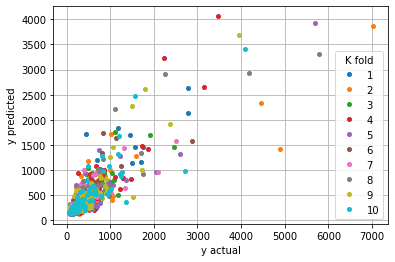

In [23]:
plot_actual_predicted(best)

### Apply model to all data

Now that we have an idea of how accurate the model is, we can apply the model to the whole data to make our predictions. Let's bring in our selected polynomial features and apply the model to all of the LSOAs.

In [24]:
# Define function to apply model to all data
def final_rfr(X, y, best_parameters):
    
    # Set up and fit model with best parameters
    model = RandomForestRegressor(n_estimators=best_parameters["n_estimators"],
                                  random_state=42,
                                  min_samples_leaf = best_parameters["min_samples_leaf"], 
                                  min_samples_split = best_parameters["min_samples_split"],
                                  max_features = best_parameters["max_features"], 
                                  max_depth = best_parameters["max_depth"], 
                                  bootstrap = best_parameters["bootstrap"])
    model.fit(X, y)
    
    # Predict labels
    y_pred = model.predict(X) 
    
    return y_pred

In [25]:
y_pred = final_rfr(X, y, best_parameters)

In [26]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['crime_total'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual   predicted
0     E01015023   706.0  685.267552
1     E01015024   203.0  247.828542
2     E01015025   245.0  209.639813
3     E01015026   524.0  596.983421
4     E01015027   480.0  391.931481
...         ...     ...         ...
1029  E01033236   120.0  171.433517
1030  E01033289   288.0  272.971387
1031  E01033291   403.0  256.093592
1032  E01033292   529.0  538.577678
1033  E01033294   305.0  337.985193

[1034 rows x 3 columns]

In [27]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_total.csv')

## Antisocial behaviour

Now let's build random forest regression models for each crime type.

In [28]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['antisocial'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [29]:
initial = initial_rf_regression(X,y)

In [30]:
initial[0:2]

(46.240041528781, 114.61212000199457)

With a mean antisocial behaviour value of 132, this initial random forest test RMSE is very high. Let's also look at the R squared values:

In [31]:
initial[2:4]

(0.9412570178026698, 0.5852168603986827)

The training R squared is high, but the test R squared is low. Let's perform some feature selection and adjust the hyper-parameters, as we did for crime total. Let's have a look at the most important features:

In [32]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars          0.319989  0.183490  0.311947  0.266656  0.312238   
flat                   0.138510  0.141943  0.109683  0.197700  0.083928   
room_rating            0.056535  0.200592  0.100468  0.085206  0.124383   
owners                 0.043258  0.057281  0.044985  0.028916  0.035928   
married                0.033748  0.030733  0.018200  0.028857  0.024258   
full_time              0.016678  0.005038  0.011656  0.014375  0.010744   
part_time              0.018556  0.001992  0.017154  0.013897  0.013014   
m_61                   0.008112  0.004873  0.009105  0.025518  0.008615   
employment_score       0.008426  0.010541  0.009484  0.010609  0.006547   
health_score           0.006151  0.009620  0.004807  0.005614  0.001274   
hospitality            0.006947  0.006882  0.007602  0.003625  0.003048   
area                   0.007363  0.002812  0.008459  0.001086  0.005216   
m_51                   0.003430  0.005153  0.005779  0.008808  0.003648   
illness                0.004923  0.001979  0.006145  0.006947  0.001706   
m_29                   0.002403  0.000603  0.002295  0.007794  0.004288   
f_37                   0.006948  0.000469  0.003070  0.003511  0.004204   
m_30                   0.002346  0.000416  0.003891  0.005256  0.007262   
m_31                   0.000337  0.002704  0.003850  0.003591  0.004429   
imd                    0.005915  0.003646  0.002454  0.003520  0.005362   
geographical_barriers  0.008079  0.003568  0.002599  0.002947  0.006306   
income_score           0.003186  0.003781  0.003362  0.002960  0.003965   
finance                0.004875  0.003399  0.002475  0.001679  0.001952   
m_44                   0.003498  0.003656  0.007160  0.003139  0.001577   
f_57                   0.003463  0.005187  0.001850  0.003012  0.002030   
people_sq_km           0.012749  0.001629  0.001036  0.000697  0.000284   
alternative_transport  0.005980  0.001179  0.002364  0.003733  0.002284   
f_84                   0.002830  0.000405  0.004303  0.004708  0.005995   
energy                 0.006602  0.006951  0.004558  0.001260  0.002226   
m_27                   0.000888  0.000608  0.002133  0.002393  0.002378   
m_63                   0.001900  0.000492  0.000978  0.003972  0.006661   

                        split_6   split_7   split_8   split_9  split_10  \
two_plus_cars          0.278316  0.266157  0.279561  0.256336  0.275432   
flat                   0.211758  0.172443  0.145422  0.155686  0.146788   
room_rating            0.061313  0.087022  0.077432  0.096074  0.093931   
owners                 0.028104  0.039041  0.041379  0.038032  0.031704   
married                0.030103  0.026044  0.030518  0.026438  0.028907   
full_time              0.013538  0.022225  0.023027  0.010396  0.017169   
part_time              0.013341  0.013904  0.021443  0.004995  0.016961   
m_61                   0.006499  0.008392  0.000931  0.009211  0.017431   
employment_score       0.006732  0.006677  0.009029  0.007494  0.014733   
health_score           0.008044  0.004469  0.006916  0.008493  0.011846   
hospitality            0.004983  0.006143  0.007185  0.006726  0.005988   
area                   0.008493  0.002163  0.008326  0.007208  0.004940   
m_51                   0.008012  0.002442  0.004577  0.005670  0.001776   
illness                0.006533  0.004404  0.002163  0.004062  0.003947   
m_29                   0.000371  0.008585  0.000392  0.009333  0.006556   
f_37                   0.004695  0.006332  0.001625  0.008477  0.003118   
m_30                   0.002783  0.003096  0.003906  0.004438  0.008670   
m_31                   0.006248  0.004061  0.005366  0.006487  0.004366   
imd                    0.002141  0.002195  0.003308  0.003360  0.007430   
geographical_barriers  0.001667  0.002325  0.001714  0.004770  0.004583   
income_score           0.004497  0.004760  0.003636  0.003394  0.003768   
finance                0.005546  0.002991  0.009

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [33]:
top_features = top_30_features(initial)

In [34]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('antisocial')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('antisocial',axis=1) 
y_df = feature_selected['antisocial'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [35]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [36]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(40.67224654697867, 102.56820289883149)

Both RMSEs have been reduced. And R squared:

In [37]:
best[2:4]

(0.9545474580966052, 0.6641427593034726)

Both have been increased.

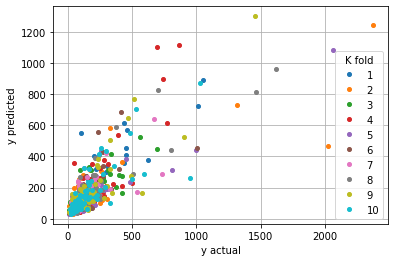

In [38]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [39]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [40]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['antisocial'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023   179.0    190.829
1     E01015024    36.0     57.748
2     E01015025    59.0     54.699
3     E01015026   138.0    183.376
4     E01015027   155.0    122.892
...         ...     ...        ...
1029  E01033236    31.0     44.785
1030  E01033289    84.0     76.900
1031  E01033291    80.0     71.535
1032  E01033292   157.0    167.398
1033  E01033294   102.0    105.643

[1034 rows x 3 columns]

In [41]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_antisocial.csv')

## Bike theft

In [42]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['bike_theft'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [43]:
initial = initial_rf_regression(X,y)

In [44]:
initial[0:2]

(1.7901855984509072, 4.044978618511081)

With a mean bike theft value of 2.6, this initial random forest test RMSE is very high. And the R squared:

In [45]:
initial[2:4]

(0.9339082745975915, 0.4972245491157576)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [46]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
chinese                 0.172295  0.029289  0.174505  0.147332  0.129504   
british_birth           0.135873  0.205105  0.115510  0.142709  0.122867   
married                 0.116008  0.057526  0.098969  0.087734  0.119559   
m_27                    0.028510  0.014609  0.017089  0.016047  0.014366   
alternative_transport   0.034106  0.018773  0.037639  0.045592  0.033085   
private_transport       0.008178  0.040666  0.021085  0.047049  0.029976   
white                   0.035055  0.037380  0.020779  0.027340  0.026233   
room_rating             0.004991  0.081749  0.022051  0.011219  0.026480   
f_19                    0.026062  0.056032  0.021946  0.043405  0.010473   
flat                    0.023117  0.013442  0.016166  0.016276  0.011715   
two_plus_cars           0.031358  0.003207  0.012288  0.030057  0.007772   
m_26                    0.008774  0.009215  0.022838  0.002319  0.038544   
m_25                    0.016817  0.010240  0.007514  0.013507  0.027226   
m_35                    0.008584  0.000771  0.012846  0.014851  0.022760   
m_38                    0.014995  0.001600  0.004263  0.006348  0.012081   
f_25                    0.002854  0.006883  0.023255  0.008364  0.013485   
f_26                    0.006486  0.010379  0.001426  0.006896  0.016315   
no_children             0.008372  0.007748  0.009113  0.007082  0.007197   
owners                  0.011420  0.003710  0.006714  0.003620  0.000946   
m_20                    0.000360  0.009934  0.007824  0.003928  0.021559   
m_all_ages              0.006148  0.019847  0.008697  0.003938  0.004994   
social_rent             0.007926  0.005948  0.006049  0.006348  0.005238   
m_33                    0.000768  0.000915  0.006656  0.003351  0.001436   
m_18                    0.007124  0.008673  0.005454  0.002007  0.008418   
m_73                    0.004684  0.000437  0.002482  0.002902  0.001933   
idaopi                  0.000501  0.002113  0.008708  0.006462  0.011069   
f_20                    0.004275  0.021640  0.009359  0.003274  0.008309   
terrace                 0.005340  0.006730  0.008536  0.006085  0.001834   
m_31                    0.001324  0.002410  0.004645  0.006590  0.005589   
non_dependent_children  0.001830  0.006650  0.005599  0.003461  0.000626   

                         split_6   split_7   split_8   split_9  split_10  \
chinese                 0.099878  0.142496  0.258998  0.099090  0.125057   
british_birth           0.088260  0.078185  0.153693  0.111582  0.077221   
married                 0.084244  0.143851  0.096076  0.091226  0.093494   
m_27                    0.079041  0.109101  0.019679  0.009296  0.058055   
alternative_transport   0.040565  0.027680  0.027405  0.028804  0.021799   
private_transport       0.024030  0.009795  0.018515  0.039519  0.050670   
white                   0.030410  0.025009  0.013466  0.034365  0.036001   
room_rating             0.046929  0.022477  0.010382  0.022058  0.024289   
f_19                    0.010800  0.005677  0.007354  0.012499  0.045223   
flat                    0.048199  0.019530  0.017113  0.015462  0.023346   
two_plus_cars           0.050803  0.019612  0.004386  0.029106  0.013333   
m_26                    0.003890  0.008760  0.012317  0.028752  0.029944   
m_25                    0.020106  0.008304  0.001588  0.051846  0.007888   
m_35                    0.028141  0.024934  0.006958  0.009272  0.012138   
m_38                    0.024838  0.013450  0.010881  0.002634  0.015158   
f_25                    0.000895  0.008386  0.011663  0.012796  0.001995   
f_26                    0.000450  0.007376  0.018523  0.008326  0.001917   
no_children             0.006427  0.003116  0.008491  0.005342  0.006085   
owners                  0.001863  0.001769  0.005865  0.019711  0.012360   
m_20                    0.000610  0.002411  0.006856  0.006296  0.005120   
m_all_ages              0.001164  0.005817  0.000990  0.008813  0.001238

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [47]:
top_features = top_30_features(initial)

In [48]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('bike_theft')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('bike_theft',axis=1) 
y_df = feature_selected['bike_theft'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [49]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   40.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [50]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(2.564733635798958, 3.874093958414086)

Both RMSEs have been reduced. And R squared:

In [51]:
best[2:4]

(0.8649618420761283, 0.5849729261080662)

Both have increased.

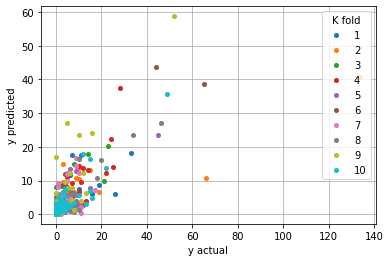

In [52]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [53]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [54]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['bike_theft'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     4.0   3.552305
1     E01015024     1.0   0.889946
2     E01015025     1.0   0.974092
3     E01015026     2.0   2.505545
4     E01015027     1.0   1.120393
...         ...     ...        ...
1029  E01033236     3.0   2.792153
1030  E01033289     1.0   1.377575
1031  E01033291     0.0   0.262636
1032  E01033292     0.0   1.294065
1033  E01033294     0.0   1.497485

[1034 rows x 3 columns]

In [55]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_bike_theft.csv')

## Burglary

In [56]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['burglary'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [57]:
initial = initial_rf_regression(X,y)

In [58]:
initial[0:2]

(3.966608129601113, 10.444031012489054)

With a mean bike theft value of 17.6, this initial random forest test RMSE is very high. And the R squared:

In [59]:
initial[2:4]

(0.9362217182871027, 0.522631523339016)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [60]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
room_rating         0.154278  0.228971  0.269706  0.295123  0.300647   
flat                0.166099  0.195515  0.120223  0.149419  0.082592   
two_plus_cars       0.068102  0.019210  0.031768  0.025125  0.036331   
new_eu_birth        0.018617  0.046780  0.039236  0.020381  0.034984   
married             0.030677  0.010770  0.019216  0.029793  0.018644   
owners              0.023579  0.010298  0.017715  0.008383  0.027325   
semi_detached       0.052075  0.003948  0.017539  0.012409  0.011591   
health_score        0.018092  0.011907  0.015632  0.012913  0.007708   
private_rent        0.012985  0.020233  0.008760  0.006587  0.021542   
education           0.003787  0.007967  0.011039  0.008886  0.017209   
f_all_ages          0.010296  0.013788  0.007352  0.008924  0.005696   
imd                 0.007627  0.013034  0.008867  0.006592  0.008677   
2018_population     0.007832  0.009664  0.007065  0.007475  0.014514   
m_all_ages          0.004983  0.007374  0.006216  0.011978  0.007530   
language            0.005121  0.010911  0.006441  0.004387  0.006746   
detached            0.008658  0.004177  0.004386  0.003603  0.008298   
full_time           0.006419  0.003992  0.005740  0.005690  0.006524   
part_time           0.005109  0.003366  0.004042  0.010979  0.005836   
m_38                0.005825  0.002367  0.004972  0.005750  0.008799   
employment_score    0.005103  0.007115  0.005999  0.004262  0.005002   
m_27                0.007030  0.001483  0.003245  0.005468  0.004650   
hospitality         0.003479  0.005752  0.006502  0.003475  0.002972   
m_49                0.002200  0.001558  0.007503  0.003584  0.008524   
idaci               0.003357  0.005173  0.004257  0.004919  0.003678   
idaopi              0.006073  0.003195  0.007329  0.005203  0.003082   
wider_barriers      0.002378  0.003266  0.002717  0.010510  0.005013   
private_transport   0.003881  0.003798  0.004778  0.004131  0.003371   
outdoors_score      0.006406  0.003395  0.004974  0.004062  0.003799   
m_62                0.000930  0.000751  0.004128  0.003303  0.008165   
living_environment  0.005431  0.004120  0.002962  0.004435  0.002864   

                     split_6   split_7   split_8   split_9  split_10      mean  
room_rating         0.267545  0.240378  0.211199  0.263872  0.260099  0.249182  
flat                0.151143  0.180304  0.179265  0.123465  0.111242  0.145927  
two_plus_cars       0.062542  0.037493  0.014596  0.044751  0.051086  0.039101  
new_eu_birth        0.024613  0.015720  0.030659  0.011455  0.028178  0.027062  
married             0.012498  0.022603  0.014948  0.025951  0.025374  0.021047  
owners              0.020603  0.007973  0.048830  0.020161  0.008558  0.019343  
semi_detached       0.013095  0.013853  0.012178  0.008920  0.020952  0.016656  
health_score        0.019979  0.010394  0.009862  0.011427  0.019032  0.013695  
private_rent        0.006207  0.006600  0.010117  0.007059  0.008682  0.010877  
education           0.009516  0.023397  0.006529  0.010642  0.005447  0.010442  
f_all_ages          0.004450  0.010414  0.011206  0.006887  0.010038  0.008905  
imd                 0.006091  0.011531  0.006584  0.011063  0.008506  0.008857  
2018_population     0.006336  0.007542  0.006958  0.009874  0.011276  0.008854  
m_all_ages          0.005575  0.009531  0.008149  0.006417  0.012069  0.007982  
language            0.006541  0.006596  0.005862  0.006960  0.004470  0.006404  
detached            0.004902  0.007758  0.011351  0.005047  0.005388  0.006357  
full_time           0.004988  0.007120  0.008623  0.007004  0.002701  0.005880  
part_time           0.005274  0.005335  0.003091  0.008249  0.005922  0.005720  
m_38                0.004071  0.003285  0.003137  0.009720  0.007586  0.005551  
employment_score    0.002261  0.003992  0.006932  0.005482  0.005666  0.005182  
m_27                0.005322  0.006710  0.010320  0.001971  0.005494  0.005169  
hospit

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [61]:
top_features = top_30_features(initial)

In [62]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('burglary')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('burglary',axis=1) 
y_df = feature_selected['burglary'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [63]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.9min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [64]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(3.6467247132176035, 9.811203860508119)

Both RMSEs have been reduced. And R squared:

In [65]:
best[2:4]

(0.9461235206705743, 0.5777005516314743)

Both have increased.

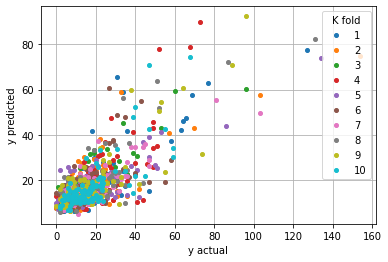

In [66]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [67]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [68]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['burglary'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    31.0     27.953
1     E01015024    22.0     18.319
2     E01015025    11.0     10.982
3     E01015026    13.0     17.089
4     E01015027    22.0     18.935
...         ...     ...        ...
1029  E01033236    11.0     12.174
1030  E01033289    15.0     15.657
1031  E01033291    22.0     18.658
1032  E01033292    17.0     17.214
1033  E01033294    14.0     15.782

[1034 rows x 3 columns]

In [69]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_burglary.csv')

## Criminal damage and arson

In [70]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['damage_arson'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [71]:
initial = initial_rf_regression(X,y)

In [72]:
initial[0:2]

(9.378701493041493, 23.868711285625796)

With a mean criminal damage and arson value of 44.2, this initial random forest test RMSE is high. And the R squared:

In [73]:
initial[2:4]

(0.9488017502946681, 0.6344501622722626)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [74]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
room_rating            0.101392  0.187043  0.180739  0.214878  0.168855   
two_plus_cars          0.218923  0.078701  0.188163  0.140287  0.154211   
married                0.116970  0.106328  0.092629  0.083425  0.146702   
owners                 0.117127  0.194544  0.070955  0.097606  0.089131   
flat                   0.034732  0.033832  0.025663  0.021489  0.013757   
employment_score       0.017128  0.015102  0.015423  0.011023  0.010676   
m_29                   0.009772  0.001292  0.012402  0.036449  0.017788   
imd                    0.005931  0.008144  0.009062  0.009213  0.004686   
new_eu_birth           0.005716  0.012068  0.021079  0.005005  0.006665   
education              0.001830  0.003432  0.005866  0.011559  0.013672   
part_time              0.007310  0.004078  0.004672  0.007448  0.005237   
wider_barriers         0.002965  0.005012  0.014312  0.004119  0.009686   
health_score           0.011215  0.005995  0.002451  0.008515  0.003366   
m_38                   0.003176  0.001502  0.004278  0.008007  0.003420   
m_51                   0.005217  0.005689  0.005857  0.006166  0.004565   
full_time              0.004450  0.000856  0.003211  0.010181  0.005603   
alternative_transport  0.002967  0.004123  0.005024  0.006993  0.004553   
income_score           0.004891  0.007688  0.007162  0.003360  0.004193   
idaopi                 0.005163  0.003696  0.006977  0.006324  0.006060   
single                 0.003911  0.008671  0.010041  0.003479  0.001745   
f_24                   0.006993  0.004966  0.001543  0.004472  0.004242   
m_all_ages             0.003156  0.003845  0.004774  0.006367  0.003163   
m_56                   0.001387  0.003113  0.003918  0.004109  0.006248   
f_all_ages             0.003099  0.003832  0.003440  0.003359  0.002537   
british_birth          0.001441  0.002864  0.002325  0.000996  0.004457   
2018_population        0.003024  0.003754  0.002197  0.004381  0.002844   
geographical_barriers  0.003239  0.002579  0.001802  0.001573  0.004478   
m_46                   0.006332  0.001385  0.001717  0.002217  0.003645   
f_21                   0.003528  0.003339  0.002720  0.002695  0.002085   
unemployment           0.001611  0.005045  0.003496  0.003385  0.002046   

                        split_6   split_7   split_8   split_9  split_10  \
room_rating            0.171928  0.172187  0.211596  0.103837  0.193791   
two_plus_cars          0.219001  0.143562  0.122432  0.186055  0.179385   
married                0.112927  0.145637  0.125919  0.167104  0.132282   
owners                 0.069650  0.092934  0.081906  0.087354  0.045381   
flat                   0.019845  0.035405  0.023086  0.031829  0.022175   
employment_score       0.013984  0.014956  0.015637  0.013957  0.019250   
m_29                   0.006901  0.013402  0.011120  0.015848  0.009559   
imd                    0.006074  0.004568  0.004779  0.006499  0.016053   
new_eu_birth           0.004847  0.004881  0.004807  0.001118  0.006723   
education              0.009859  0.010549  0.003625  0.005835  0.005798   
part_time              0.006484  0.006499  0.006584  0.005265  0.012804   
wider_barriers         0.002284  0.003041  0.009785  0.006975  0.005737   
health_score           0.006383  0.004099  0.005467  0.004977  0.007421   
m_38                   0.004073  0.006311  0.013317  0.010369  0.005071   
m_51                   0.005328  0.007655  0.007937  0.007792  0.002905   
full_time              0.007054  0.009412  0.005996  0.003852  0.008016   
alternative_transport  0.003467  0.007136  0.006343  0.008585  0.007099   
income_score           0.007046  0.002750  0.006438  0.002500  0.004946   
idaopi                 0.004895  0.003721  0.003715  0.003254  0.004733   
single                 0.005390  0.002127  0.004123  0.005894  0.000660   
f_24                   0.003867  0.004532  0.003293  0.003684  0.004801   
m_all_ages             0.002558  0.004207  0.001

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [75]:
top_features = top_30_features(initial)

In [76]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('damage_arson')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('damage_arson',axis=1) 
y_df = feature_selected['damage_arson'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [77]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.9min finished


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [78]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(11.257062837550933, 22.709001074225032)

The test RMSE has been reduced. And R squared:

In [79]:
best[2:4]

(0.9262700629466775, 0.6732338083308405)

The test value has increased.

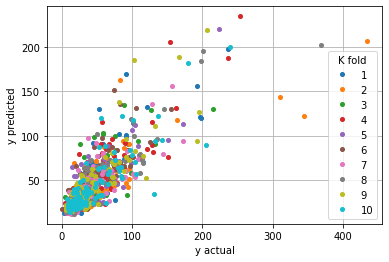

In [80]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [81]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [82]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['damage_arson'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    73.0  75.892734
1     E01015024    16.0  24.708971
2     E01015025    19.0  19.345555
3     E01015026    59.0  70.295804
4     E01015027    51.0  37.886146
...         ...     ...        ...
1029  E01033236    14.0  17.738969
1030  E01033289    36.0  33.732819
1031  E01033291    59.0  42.613082
1032  E01033292    62.0  64.338300
1033  E01033294    24.0  30.682828

[1034 rows x 3 columns]

In [83]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_damage_arson.csv')

## Drugs

In [84]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['drugs'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [85]:
initial = initial_rf_regression(X,y)

In [86]:
initial[0:2]

(6.374547962178878, 15.66619180316716)

With a mean drugs value of 12, this initial random forest test RMSE is very high. And the R squared:

In [87]:
initial[2:4]

(0.9379406191603092, 0.49491827171774483)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [88]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars          0.297490  0.168902  0.237379  0.217481  0.291814   
flat                   0.201844  0.182016  0.205770  0.168068  0.087904   
room_rating            0.075412  0.185551  0.083351  0.126716  0.117974   
married                0.055314  0.040717  0.052441  0.054266  0.040972   
m_27                   0.026395  0.000220  0.027183  0.017114  0.033657   
alternative_transport  0.008114  0.004860  0.014327  0.006283  0.022161   
british_birth          0.003270  0.007210  0.002037  0.000838  0.014857   
semi_detached          0.005586  0.007665  0.024335  0.008749  0.010730   
private_rent           0.006814  0.009344  0.007663  0.011274  0.015226   
arab                   0.011722  0.024455  0.002190  0.005073  0.006826   
health_score           0.002463  0.009369  0.006283  0.002527  0.013593   
education              0.002766  0.002607  0.005795  0.005416  0.006964   
m_32                   0.002404  0.011681  0.004379  0.015915  0.005053   
m_38                   0.009660  0.000251  0.007381  0.007757  0.000828   
m_53                   0.000695  0.011957  0.005141  0.002637  0.003624   
wider_barriers         0.001595  0.002137  0.003418  0.005754  0.003857   
owners                 0.003526  0.001972  0.004639  0.000649  0.006575   
m_26                   0.003101  0.012839  0.002149  0.003441  0.002992   
unpaid_care            0.005662  0.006022  0.005700  0.006321  0.005463   
m_69                   0.002522  0.009531  0.002738  0.005819  0.007007   
m_29                   0.002746  0.006345  0.004269  0.006563  0.007093   
language               0.003326  0.003395  0.002919  0.003458  0.005020   
m_8                    0.000228  0.003656  0.003076  0.004841  0.003829   
m_all_ages             0.006913  0.004736  0.002798  0.005509  0.002216   
m_25                   0.001411  0.003183  0.005025  0.007861  0.002262   
m_31                   0.003920  0.002028  0.003469  0.003192  0.001697   
m_35                   0.009558  0.003254  0.003255  0.001337  0.001138   
f_14                   0.002558  0.002053  0.002130  0.002960  0.005033   
m_24                   0.005529  0.001892  0.006309  0.001937  0.002728   
private_transport      0.005107  0.001466  0.003041  0.010219  0.002966   

                        split_6   split_7   split_8   split_9  split_10  \
two_plus_cars          0.317896  0.276169  0.137531  0.321868  0.271502   
flat                   0.164896  0.174140  0.332179  0.118192  0.185276   
room_rating            0.078835  0.106637  0.080422  0.093968  0.090866   
married                0.031212  0.049788  0.045881  0.030293  0.037979   
m_27                   0.028536  0.026700  0.011716  0.000919  0.017058   
alternative_transport  0.010659  0.020840  0.009497  0.026465  0.014804   
british_birth          0.026572  0.017066  0.022476  0.025513  0.003423   
semi_detached          0.006076  0.003708  0.021023  0.009017  0.001951   
private_rent           0.005659  0.003795  0.012534  0.005198  0.008404   
arab                   0.002261  0.005514  0.005367  0.001572  0.010077   
health_score           0.008987  0.003879  0.003058  0.004024  0.019835   
education              0.003902  0.006936  0.007709  0.011960  0.003940   
m_32                   0.003979  0.002458  0.004845  0.002608  0.000804   
m_38                   0.005309  0.004513  0.009766  0.002330  0.004812   
m_53                   0.004685  0.002343  0.004301  0.005995  0.005536   
wider_barriers         0.001524  0.003871  0.011034  0.010347  0.002921   
owners                 0.000398  0.002824  0.005142  0.015234  0.005365   
m_26                   0.007325  0.007246  0.000844  0.003226  0.002920   
unpaid_care            0.004329  0.003456  0.000383  0.004868  0.003566   
m_69                   0.005519  0.005397  0.002298  0.001433  0.003237   
m_29                   0.001144  0.007569  0.002008  0.001193  0.003764   
language               0.002695  0.004526  0.006

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [89]:
top_features = top_30_features(initial)

In [90]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('drugs')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('drugs',axis=1) 
y_df = feature_selected['drugs'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [91]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.2min
/home/megan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.8min finished


{'n_estimators': 1200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [92]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(7.933634075622505, 14.106656056634137)

Both have been reduced. And R squared:

In [93]:
best[2:4]

(0.903826258374818, 0.5855366594718263)

Both have increased. 

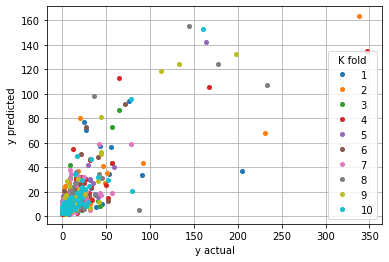

In [94]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [95]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [96]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['drugs'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     8.0   9.958224
1     E01015024     1.0   3.905352
2     E01015025     8.0   6.844764
3     E01015026    17.0  17.143154
4     E01015027     7.0   6.348067
...         ...     ...        ...
1029  E01033236     0.0   2.945485
1030  E01033289     1.0   3.726977
1031  E01033291     3.0   3.386431
1032  E01033292     8.0  10.131891
1033  E01033294     2.0   6.225140

[1034 rows x 3 columns]

In [97]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_drugs.csv')

## Other crime

In [98]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['other_crime'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [99]:
initial = initial_rf_regression(X,y)

In [100]:
initial[0:2]

(3.302039608851554, 7.256119210855689)

With a mean bike theft value of 6.7, this initial random forest test RMSE is high. And the R squared:

In [101]:
initial[2:4]

(0.8786776743731354, 0.20309832742211603)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [102]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5   split_6  \
storage           0.244926  0.259112  0.122034  0.296641  0.205663  0.218324   
two_plus_cars     0.090428  0.055891  0.097356  0.056007  0.105329  0.107156   
flat              0.053665  0.049468  0.047288  0.071886  0.019473  0.050597   
illness           0.060706  0.050251  0.061129  0.044292  0.054182  0.060160   
education         0.041471  0.022475  0.115484  0.033947  0.055428  0.064538   
m_52              0.048893  0.056987  0.045615  0.046577  0.049573  0.045245   
m_44              0.045509  0.061592  0.048163  0.047716  0.044497  0.034615   
m_33              0.036910  0.003020  0.043658  0.034559  0.053571  0.034507   
owners            0.027935  0.017852  0.030626  0.027788  0.014711  0.022729   
single            0.014902  0.034008  0.020874  0.022584  0.033618  0.021591   
married           0.017839  0.017387  0.011920  0.017048  0.027058  0.022231   
health_score      0.013510  0.013155  0.009295  0.009818  0.014889  0.004164   
f_10              0.015296  0.018462  0.019218  0.000547  0.000344  0.007165   
area              0.014450  0.012360  0.008567  0.009908  0.007093  0.005943   
m_56              0.008515  0.010120  0.012334  0.003438  0.004454  0.009914   
people_sq_km      0.006898  0.007990  0.011602  0.016354  0.010010  0.006479   
energy            0.005667  0.004235  0.003270  0.010176  0.002216  0.005873   
employment_score  0.005193  0.008023  0.006131  0.006992  0.004522  0.008228   
imd               0.004060  0.004542  0.006361  0.003905  0.005399  0.005469   
m_32              0.006539  0.003619  0.009354  0.004287  0.001663  0.007143   
communal          0.002770  0.008015  0.000853  0.009622  0.009427  0.004621   
bangladeshi       0.005863  0.003664  0.005561  0.007134  0.004883  0.000930   
finance           0.008069  0.003702  0.005251  0.003484  0.006865  0.004846   
idaci             0.004277  0.003635  0.009354  0.001815  0.002264  0.002272   
m_30              0.003101  0.016877  0.003263  0.001606  0.007792  0.002468   
room_rating       0.002655  0.008715  0.003466  0.006998  0.003127  0.001390   
f_49              0.001276  0.000874  0.000948  0.000883  0.000518  0.004920   
income_score      0.004266  0.002699  0.003771  0.001715  0.006216  0.002433   
m_26              0.002819  0.008162  0.002379  0.002388  0.002462  0.004171   
m_61              0.003356  0.001418  0.002717  0.004289  0.008270  0.002051   

                   split_7   split_8   split_9  split_10      mean  
storage           0.228236  0.215572  0.271494  0.002243  0.206424  
two_plus_cars     0.075769  0.072884  0.093237  0.199660  0.095372  
flat              0.070730  0.035603  0.075411  0.066229  0.054035  
illness           0.063084  0.055913  0.043130  0.001987  0.049483  
education         0.040277  0.050513  0.066714  0.001435  0.049228  
m_52              0.026421  0.043187  0.001197  0.085486  0.044918  
m_44              0.040303  0.037373  0.001338  0.069364  0.043047  
m_33              0.051670  0.068516  0.005573  0.064330  0.039631  
owners            0.022847  0.024410  0.019899  0.034004  0.024280  
single            0.012437  0.018230  0.031402  0.023538  0.023318  
married           0.022477  0.019860  0.033294  0.039017  0.022813  
health_score      0.008041  0.012262  0.008430  0.022135  0.011570  
f_10              0.012090  0.017407  0.000785  0.000687  0.009200  
area              0.011356  0.007482  0.007743  0.001888  0.008679  
m_56              0.011515  0.011934  0.012277  0.001073  0.008557  
people_sq_km      0.006114  0.010023  0.004880  0.001058  0.008141  
energy            0.013858  0.005460  0.018560  0.002056  0.007137  
employment_score  0.009188  0.005915  0.005231  0.005743  0.006517  
imd               0.005573  0.003263  0.006115  0.010660  0.005535  
m_32              0.000828  0.005902  0.002305  0.010129  0.005177  
communal          0.000809  0.007947  0.001632  0.004733  0.005043  
bangladeshi       0.

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [103]:
top_features = top_30_features(initial)

In [104]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('other_crime')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('other_crime',axis=1) 
y_df = feature_selected['other_crime'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [105]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  6.8min finished


{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': True}

In [106]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(6.2516963670687264, 6.682394768843042)

The test RMSE has been reduced. And R squared:

In [107]:
best[2:4]

(0.5660679702281556, 0.3621111444245927)

The test value has increased.

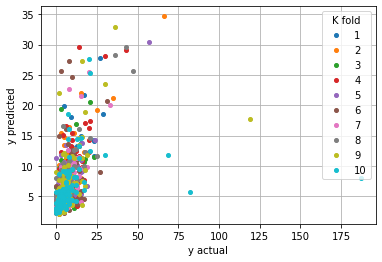

In [108]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [109]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [110]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['other_crime'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    14.0  12.843066
1     E01015024     7.0   6.133438
2     E01015025     9.0   5.739638
3     E01015026    10.0  12.563808
4     E01015027     6.0   6.117907
...         ...     ...        ...
1029  E01033236     1.0   2.944128
1030  E01033289     1.0   3.426373
1031  E01033291     8.0   5.250402
1032  E01033292     3.0   6.564296
1033  E01033294    10.0   7.344719

[1034 rows x 3 columns]

In [111]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_other_crime.csv')

## Other theft

In [112]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['other_theft'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [113]:
initial = initial_rf_regression(X,y)

In [114]:
initial[0:2]

(10.712986566279813, 26.94120862628942)

With a mean other theft value of 31.4, this initial random forest test RMSE is high. And the R squared:

In [115]:
initial[2:4]

(0.9311753999529364, 0.49555702708127425)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [116]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars           0.246436  0.101172  0.174097  0.164411  0.197719   
flat                    0.150469  0.093451  0.154246  0.203678  0.106386   
room_rating             0.110885  0.279443  0.155026  0.129711  0.143457   
illness                 0.023948  0.019814  0.014673  0.019602  0.014411   
idaopi                  0.006128  0.018618  0.014400  0.010036  0.010742   
full_time               0.008718  0.000828  0.004625  0.011777  0.012134   
part_time               0.017313  0.002071  0.013375  0.015168  0.004261   
f_36                    0.004597  0.008809  0.006164  0.004206  0.008429   
2018_population         0.007627  0.011020  0.005261  0.008064  0.009554   
owners                  0.010375  0.005995  0.005054  0.003474  0.009832   
british_birth           0.003103  0.001195  0.003221  0.009137  0.005102   
f_all_ages              0.007354  0.009500  0.006694  0.011158  0.010308   
m_all_ages              0.005544  0.011378  0.010547  0.006220  0.007354   
f_47                    0.006814  0.014972  0.007703  0.010202  0.002473   
m_33                    0.002939  0.002985  0.004591  0.001835  0.010301   
f_42                    0.010790  0.002236  0.008896  0.002454  0.004263   
married                 0.010161  0.009200  0.008494  0.005911  0.009115   
alternative_transport   0.003232  0.003209  0.006639  0.008206  0.003268   
chinese                 0.004504  0.002239  0.004625  0.000806  0.008318   
m_31                    0.001457  0.003036  0.004204  0.006330  0.010476   
geographical_barriers   0.013354  0.001903  0.007186  0.002381  0.002515   
f_27                    0.005745  0.006294  0.008423  0.005727  0.004070   
hospitality             0.002308  0.005190  0.005198  0.006920  0.003915   
private_transport       0.001916  0.006136  0.003898  0.005287  0.008133   
m_45                    0.000505  0.009539  0.004358  0.005033  0.006208   
non_dependent_children  0.004829  0.001472  0.002894  0.013293  0.007786   
m_32                    0.001440  0.002522  0.004631  0.007441  0.009183   
m_26                    0.000428  0.004393  0.002290  0.004678  0.007512   
m_27                    0.002246  0.000778  0.003620  0.002328  0.006212   
f_45                    0.003175  0.004979  0.005704  0.002545  0.003594   

                         split_6   split_7   split_8   split_9  split_10  \
two_plus_cars           0.205163  0.125504  0.137727  0.179762  0.144601   
flat                    0.179514  0.190023  0.173379  0.157491  0.195086   
room_rating             0.123253  0.162944  0.131866  0.118635  0.151202   
illness                 0.019950  0.015386  0.017384  0.015276  0.003709   
idaopi                  0.007929  0.008255  0.008221  0.011478  0.016497   
full_time               0.007801  0.014092  0.018920  0.005807  0.009481   
part_time               0.013580  0.008402  0.006824  0.003521  0.006062   
f_36                    0.010086  0.009057  0.004982  0.016422  0.014100   
2018_population         0.005156  0.006348  0.013141  0.007519  0.006725   
owners                  0.005966  0.006473  0.004846  0.019139  0.008555   
british_birth           0.007677  0.011904  0.021187  0.015924  0.001128   
f_all_ages              0.003969  0.005115  0.008630  0.006861  0.009513   
m_all_ages              0.005844  0.003315  0.008086  0.007611  0.009343   
f_47                    0.005731  0.016208  0.001568  0.002006  0.004802   
m_33                    0.004597  0.009571  0.008619  0.014264  0.011112   
f_42                    0.008867  0.004634  0.008225  0.010459  0.005833   
married                 0.001578  0.002783  0.009213  0.002937  0.003007   
alternative_transport   0.007293  0.005054  0.006788  0.011150  0.007101   
chinese                 0.014473  0.003655  0.009843  0.005509  0.007802   
m_31                    0.008047  0.007143  0.004741  0.008907  0.005609   
geographical_barriers   0.009793  0.007774  0.001127  0.006127  0.005373

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [117]:
top_features = top_30_features(initial)

In [118]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('other_theft')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('other_theft',axis=1) 
y_df = feature_selected['other_theft'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [119]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': True}

In [120]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(9.829312266905124, 25.195400286999146)

Both RMSEs have been reduced. And R squared:

In [121]:
best[2:4]

(0.94223089309934, 0.5504733569492618)

Both have increased. 

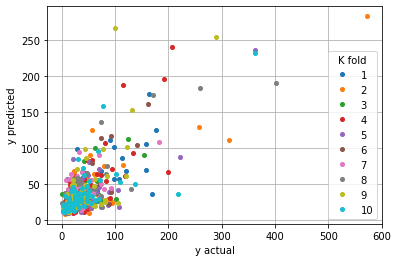

In [122]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [123]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [124]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['other_theft'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    36.0  35.926774
1     E01015024     5.0   9.934441
2     E01015025    12.0  13.789601
3     E01015026    23.0  28.543489
4     E01015027    22.0  22.005957
...         ...     ...        ...
1029  E01033236     6.0  12.353846
1030  E01033289    43.0  40.207184
1031  E01033291    28.0  24.832704
1032  E01033292    22.0  24.822130
1033  E01033294     5.0  17.351892

[1034 rows x 3 columns]

In [125]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_other_theft.csv')

## Possession of weapons

In [126]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['possession_weapons'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [127]:
initial = initial_rf_regression(X,y)

In [128]:
initial[0:2]

(1.4761339723075078, 3.6520377279115666)

With a mean possession of weapons value of 2.8, this initial random forest test RMSE is very high. And the R squared:

In [129]:
initial[2:4]

(0.9319245019933258, 0.48258371025052316)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [130]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
flat                    0.211873  0.199828  0.236660  0.222246  0.175208   
two_plus_cars           0.286422  0.179111  0.217697  0.206330  0.231103   
room_rating             0.070275  0.157013  0.091470  0.124142  0.095692   
married                 0.019080  0.017160  0.020225  0.024037  0.023967   
owners                  0.021000  0.019259  0.012265  0.019391  0.022878   
wider_barriers          0.006288  0.010437  0.014113  0.007905  0.018897   
alternative_transport   0.007874  0.002839  0.013534  0.006472  0.006675   
health_score            0.008655  0.004930  0.009989  0.005978  0.009386   
education               0.002254  0.001387  0.007948  0.010589  0.007331   
health                  0.007915  0.003835  0.009370  0.002307  0.009246   
hospitality             0.001959  0.004740  0.005321  0.004892  0.002630   
employment_score        0.008647  0.005208  0.005157  0.005375  0.003668   
single                  0.003486  0.011083  0.005679  0.002195  0.004408   
children_score          0.003389  0.005077  0.001121  0.004135  0.004310   
terrace                 0.002697  0.003426  0.001780  0.002779  0.004744   
illness                 0.002049  0.009071  0.006506  0.003881  0.005216   
private_transport       0.002284  0.001878  0.004081  0.000573  0.006686   
m_52                    0.004795  0.007541  0.006103  0.002388  0.004848   
f_85                    0.007251  0.002765  0.001492  0.005226  0.003140   
imd                     0.002585  0.007520  0.002587  0.001801  0.003129   
new_eu_birth            0.003534  0.003020  0.006190  0.001866  0.004238   
education_score         0.005219  0.002215  0.003760  0.005365  0.003011   
idaopi                  0.005565  0.002907  0.001551  0.001676  0.004757   
m_26                    0.003220  0.007660  0.005472  0.001972  0.004005   
m_29                    0.005077  0.003019  0.003325  0.003417  0.002563   
semi_detached           0.004280  0.005455  0.003236  0.003991  0.004615   
m_27                    0.006260  0.000669  0.003522  0.002551  0.004902   
non_dependent_children  0.003321  0.003624  0.005923  0.003005  0.004325   
f_18                    0.004544  0.001624  0.002252  0.003066  0.002845   
language                0.003586  0.002978  0.003359  0.004198  0.005570   

                         split_6   split_7   split_8   split_9  split_10  \
flat                    0.252784  0.294645  0.284914  0.181568  0.226307   
two_plus_cars           0.242499  0.173408  0.150662  0.285973  0.234665   
room_rating             0.062946  0.099865  0.130889  0.095094  0.090280   
married                 0.031733  0.022894  0.011388  0.019776  0.025664   
owners                  0.022672  0.014900  0.017539  0.015268  0.010407   
wider_barriers          0.010641  0.008094  0.015670  0.009907  0.015769   
alternative_transport   0.006226  0.013658  0.010090  0.014891  0.013318   
health_score            0.004366  0.005824  0.007742  0.006994  0.026248   
education               0.005201  0.007902  0.011758  0.005728  0.008629   
health                  0.009351  0.008826  0.005748  0.003697  0.005744   
hospitality             0.003619  0.005389  0.007099  0.012823  0.002886   
employment_score        0.003313  0.004351  0.003985  0.003408  0.004170   
single                  0.003374  0.003031  0.001449  0.007671  0.003466   
children_score          0.002819  0.006803  0.006498  0.004952  0.005397   
terrace                 0.010053  0.006381  0.003211  0.005886  0.003321   
illness                 0.003751  0.002562  0.004781  0.001283  0.005041   
private_transport       0.006021  0.006110  0.004249  0.009672  0.001841   
m_52                    0.003692  0.003260  0.004771  0.002352  0.003455   
f_85                    0.003973  0.005556  0.001072  0.003816  0.007475   
imd                     0.004851  0.001637  0.004064  0.006965  0.004935   
new_eu_birth            0.004384  0.005114  0.003640  0.003111  0.004942

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [131]:
top_features = top_30_features(initial)

In [132]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('possession_weapons')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('possession_weapons',axis=1) 
y_df = feature_selected['possession_weapons'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [133]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


{'n_estimators': 1000,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [134]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(0.7697552846187274, 3.321772667822708)

Both RMSEs have been reduced. And R squared:

In [135]:
best[2:4]

(0.9814575354644341, 0.5652603688651444)

Both have increased.

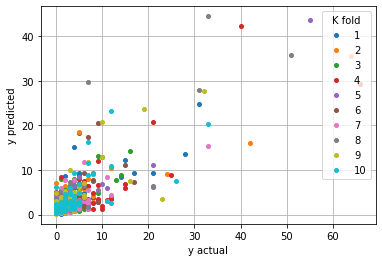

In [136]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [137]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [138]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['possession_weapons'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     3.0   3.114083
1     E01015024     0.0   0.223250
2     E01015025     2.0   1.766500
3     E01015026     3.0   3.720167
4     E01015027     0.0   0.152167
...         ...     ...        ...
1029  E01033236     0.0   0.161583
1030  E01033289     2.0   2.088500
1031  E01033291     4.0   3.338250
1032  E01033292     1.0   1.286583
1033  E01033294     3.0   2.789000

[1034 rows x 3 columns]

In [139]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_possession_weapons.csv')

## Public order offences

In [140]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['public_order'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [141]:
initial = initial_rf_regression(X,y)

In [142]:
initial[0:2]

(8.408597809996996, 20.679776257615394)

With a mean public order offence value of 20.9, this initial random forest test RMSE is very high. And the R squared:

In [143]:
initial[2:4]

(0.9346238570685127, 0.5325030787991345)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [144]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars           0.322573  0.150543  0.315875  0.242448  0.310688   
flat                    0.167092  0.181955  0.133849  0.197362  0.113076   
room_rating             0.033403  0.191931  0.041207  0.053539  0.065820   
owners                  0.033971  0.046220  0.044480  0.036380  0.035314   
married                 0.042412  0.023795  0.025452  0.032922  0.026140   
alternative_transport   0.018733  0.003459  0.023263  0.009267  0.011015   
british_birth           0.000485  0.004232  0.012030  0.008697  0.007064   
full_time               0.004300  0.004942  0.002548  0.008977  0.009373   
non_dependent_children  0.005937  0.003934  0.011053  0.007498  0.000664   
m_30                    0.002927  0.000793  0.007686  0.010517  0.013891   
m_27                    0.003183  0.002291  0.004218  0.006409  0.006982   
m_31                    0.004058  0.002192  0.005467  0.010367  0.005619   
employment_score        0.005858  0.008730  0.004539  0.005605  0.005931   
part_time               0.006303  0.002008  0.014752  0.007030  0.002178   
private_transport       0.008382  0.005263  0.003520  0.006616  0.003413   
m_29                    0.003788  0.001236  0.002431  0.006401  0.005500   
geographical_barriers   0.008468  0.004770  0.003060  0.004755  0.004037   
m_51                    0.002254  0.005273  0.004163  0.006099  0.002763   
m_24                    0.005799  0.001001  0.006739  0.000259  0.006224   
2018_population         0.005048  0.005969  0.000728  0.006999  0.004402   
health_score            0.003374  0.004836  0.002791  0.004445  0.001908   
finance                 0.002592  0.002731  0.003992  0.003279  0.007395   
admin                   0.001676  0.005136  0.004576  0.003888  0.002952   
hospitality             0.002191  0.004628  0.003641  0.003267  0.003652   
chinese                 0.003323  0.001979  0.003906  0.002149  0.005053   
semi_detached           0.003863  0.005219  0.002210  0.001959  0.006479   
new_eu_birth            0.002859  0.004279  0.005852  0.006487  0.002938   
m_61                    0.002821  0.000538  0.002045  0.006803  0.002598   
energy                  0.003964  0.005109  0.004459  0.004260  0.003412   
m_56                    0.002071  0.002754  0.003175  0.004263  0.005198   

                         split_6   split_7   split_8   split_9  split_10  \
two_plus_cars           0.305818  0.245584  0.271126  0.270702  0.332460   
flat                    0.202218  0.234151  0.132915  0.185274  0.145970   
room_rating             0.038029  0.044507  0.057220  0.034371  0.040440   
owners                  0.038046  0.031992  0.028648  0.047965  0.024342   
married                 0.023532  0.034749  0.035791  0.025018  0.034542   
alternative_transport   0.008801  0.013891  0.017502  0.015479  0.014274   
british_birth           0.005863  0.002412  0.018908  0.028138  0.001547   
full_time               0.008525  0.008890  0.012419  0.001108  0.013813   
non_dependent_children  0.004832  0.009812  0.016581  0.006729  0.004461   
m_30                    0.002496  0.007670  0.007426  0.003402  0.007512   
m_27                    0.005127  0.013476  0.006294  0.008569  0.007579   
m_31                    0.003549  0.002815  0.013891  0.008761  0.004670   
employment_score        0.005467  0.003098  0.008588  0.004466  0.007318   
part_time               0.008951  0.006838  0.004782  0.001409  0.001935   
private_transport       0.002116  0.003362  0.009075  0.002389  0.007792   
m_29                    0.004898  0.008293  0.003674  0.009585  0.004263   
geographical_barriers   0.006671  0.003535  0.005056  0.003308  0.005708   
m_51                    0.005283  0.004250  0.007202  0.005516  0.004970   
m_24                    0.007264  0.003267  0.003599  0.010171  0.003218   
2018_population         0.001422  0.002218  0.003582  0.004963  0.002605   
health_score            0.003775  0.001820  0.005815  0.003608  0.005047

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [145]:
top_features = top_30_features(initial)

In [146]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('public_order')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('public_order',axis=1) 
y_df = feature_selected['public_order'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [147]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [148]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(3.479755921911246, 19.24338819458203)

Both RMSEs have been reduced. And R squared:

In [149]:
best[2:4]

(0.9886690461510218, 0.5939751379967769)

Both have increased.

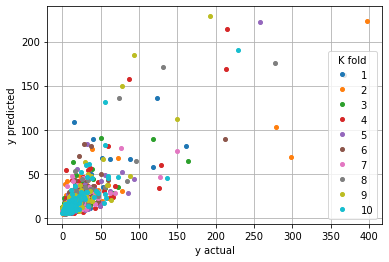

In [150]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [151]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [152]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['public_order'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    25.0  26.215833
1     E01015024     5.0   5.671944
2     E01015025    27.0  23.687500
3     E01015026    17.0  18.749167
4     E01015027    16.0  15.713611
...         ...     ...        ...
1029  E01033236     5.0   5.593889
1030  E01033289     9.0   9.196667
1031  E01033291    19.0  17.388056
1032  E01033292    24.0  23.869722
1033  E01033294     9.0   9.635556

[1034 rows x 3 columns]

In [153]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_public_order.csv')

## Robbery

In [154]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['robbery'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [155]:
initial = initial_rf_regression(X,y)

In [156]:
initial[0:2]

(1.188181074123052, 2.8979392540795303)

With a mean robbery value of 1.7, this initial random forest test RMSE is very high. And the R squared:

In [157]:
initial[2:4]

(0.936667078365326, 0.5807196894248714)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [158]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
room_rating             0.126777  0.305987  0.180922  0.277342  0.302906   
two_plus_cars           0.228641  0.134899  0.228690  0.168961  0.138519   
flat                    0.158621  0.073164  0.114856  0.116013  0.106767   
married                 0.067469  0.027233  0.037546  0.068582  0.033785   
employment_score        0.059404  0.036117  0.044629  0.004887  0.017349   
owners                  0.012367  0.007780  0.020695  0.003032  0.007531   
imd                     0.009087  0.030987  0.001328  0.000982  0.024227   
m_35                    0.034700  0.001901  0.022256  0.007005  0.005020   
wider_barriers          0.008800  0.024043  0.011580  0.002870  0.008129   
bangladeshi             0.011763  0.006985  0.004869  0.008696  0.010908   
m_33                    0.003102  0.014279  0.006903  0.009695  0.016402   
health_score            0.007343  0.013558  0.006676  0.003668  0.008154   
language                0.007421  0.011382  0.004494  0.005519  0.004048   
private_rent            0.001639  0.011596  0.004745  0.005193  0.004459   
divorced                0.000955  0.009745  0.006314  0.001374  0.016017   
british_birth           0.005052  0.001290  0.002054  0.012877  0.002866   
idaci                   0.002987  0.007623  0.003593  0.003657  0.003178   
detached                0.003923  0.003414  0.007186  0.006698  0.004724   
new_eu_birth            0.004933  0.005074  0.005553  0.004229  0.006328   
non_dependent_children  0.002058  0.003483  0.000781  0.004940  0.006250   
f_60                    0.004291  0.003509  0.005606  0.009051  0.002954   
m_3                     0.004390  0.000632  0.002459  0.003779  0.007792   
semi_detached           0.004938  0.002349  0.001656  0.003398  0.004173   
m_51                    0.005505  0.001873  0.004156  0.003631  0.002801   
m_75                    0.000844  0.006878  0.001567  0.005053  0.001576   
children_score          0.004090  0.003250  0.005126  0.002712  0.005244   
f_43                    0.002506  0.000425  0.004978  0.003981  0.002324   
f_18                    0.000728  0.000740  0.007653  0.001644  0.002198   
f_44                    0.001663  0.001352  0.002269  0.001862  0.008483   
m_63                    0.002095  0.003366  0.002293  0.001651  0.001890   

                         split_6   split_7   split_8   split_9  split_10  \
room_rating             0.157592  0.207721  0.214902  0.159087  0.179789   
two_plus_cars           0.276395  0.148582  0.200124  0.111364  0.191346   
flat                    0.140122  0.216336  0.068664  0.175046  0.182793   
married                 0.019604  0.055865  0.048250  0.041040  0.031047   
employment_score        0.030893  0.017204  0.006856  0.055584  0.016284   
owners                  0.009116  0.003221  0.048408  0.043014  0.017520   
imd                     0.006743  0.002789  0.006460  0.020668  0.021000   
m_35                    0.009609  0.004669  0.005376  0.008094  0.016631   
wider_barriers          0.007495  0.003410  0.005640  0.028984  0.008858   
bangladeshi             0.011176  0.008113  0.006928  0.010379  0.015724   
m_33                    0.005162  0.005713  0.010207  0.003598  0.009552   
health_score            0.004392  0.002798  0.009736  0.007418  0.007199   
language                0.006261  0.007295  0.003822  0.003426  0.006505   
private_rent            0.002534  0.005379  0.006551  0.002865  0.014811   
divorced                0.007255  0.001736  0.012460  0.001817  0.002086   
british_birth           0.000413  0.007579  0.000679  0.022057  0.000484   
idaci                   0.006456  0.002660  0.003300  0.008764  0.007468   
detached                0.004049  0.004586  0.003939  0.004359  0.005345   
new_eu_birth            0.003680  0.010838  0.001244  0.003362  0.002927   
non_dependent_children  0.007234  0.004613  0.009375  0.007468  0.001378   
f_60                    0.005060  0.004445  0.002490  0.001982  0.006603

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [159]:
top_features = top_30_features(initial)

In [160]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('robbery')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('robbery',axis=1) 
y_df = feature_selected['robbery'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [161]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.2min finished


{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': True}

In [162]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(1.0484767290501344, 2.636221217442876)

Both RMSEs have been reduced. And R squared:

In [163]:
best[2:4]

(0.9507023182591727, 0.6519578704881499)

Both have increased. 

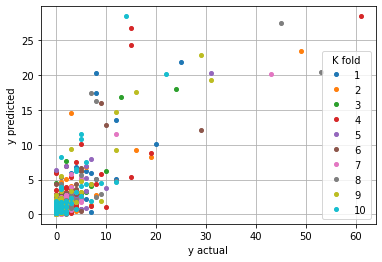

In [164]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [165]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [166]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['robbery'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     4.0      3.206
1     E01015024     0.0      0.187
2     E01015025     1.0      0.729
3     E01015026     6.0      4.697
4     E01015027     1.0      0.885
...         ...     ...        ...
1029  E01033236     0.0      0.319
1030  E01033289     0.0      0.111
1031  E01033291     2.0      1.349
1032  E01033292     1.0      1.135
1033  E01033294     1.0      0.937

[1034 rows x 3 columns]

In [167]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_robbery.csv')

## Shoplifting

In [168]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['shoplifting'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [169]:
initial = initial_rf_regression(X,y)

In [170]:
initial[0:2]

(24.69768358947241, 59.805934457110496)

With a mean shoplifting value of 23.2, this initial random forest test RMSE is very high. And the R squared:

In [171]:
initial[2:4]

(0.894328512421399, 0.11358880360923536)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [172]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars           0.297234  0.215088  0.267928  0.211710  0.258240   
flat                    0.108060  0.176765  0.114252  0.103172  0.026687   
british_birth           0.011940  0.022248  0.017987  0.008435  0.027384   
room_rating             0.013748  0.024606  0.015254  0.028440  0.030810   
alternative_transport   0.030655  0.003799  0.017339  0.018296  0.029798   
divorced                0.013291  0.010649  0.010798  0.011749  0.024134   
bangladeshi             0.012174  0.001483  0.016614  0.026958  0.026309   
private_transport       0.009283  0.015364  0.006074  0.024204  0.000653   
non_dependent_children  0.010723  0.005800  0.008566  0.012675  0.009949   
old_eu_birth            0.002911  0.022499  0.008889  0.008084  0.010279   
semi_detached           0.012680  0.002442  0.005411  0.003881  0.008403   
geographical_barriers   0.007560  0.005110  0.011009  0.005623  0.013061   
f_51                    0.002079  0.010666  0.002587  0.031245  0.002392   
detached                0.001618  0.009429  0.006230  0.010100  0.000876   
new_eu_birth            0.001204  0.008784  0.007753  0.006096  0.020220   
m_31                    0.008725  0.006524  0.002304  0.012764  0.010497   
f_88                    0.007172  0.000884  0.010055  0.004514  0.018420   
health_score            0.001761  0.005065  0.006255  0.007556  0.000854   
hospitality             0.011790  0.006758  0.005989  0.007215  0.004102   
admin                   0.005992  0.003465  0.008417  0.007099  0.007804   
social_rent             0.012418  0.001098  0.002491  0.009887  0.011043   
employment_score        0.008559  0.010141  0.005408  0.011366  0.000877   
private_rent            0.002208  0.007824  0.006055  0.005267  0.009294   
f_37                    0.004398  0.001027  0.009286  0.003659  0.006111   
finance                 0.006556  0.007170  0.008203  0.003627  0.004818   
m_34                    0.005267  0.004791  0.004896  0.011767  0.009253   
full_time               0.006989  0.000815  0.003819  0.004318  0.003697   
m_30                    0.005028  0.000277  0.012202  0.004909  0.007447   
part_time               0.005627  0.000576  0.005312  0.009177  0.002687   
storage                 0.003078  0.003517  0.004114  0.006511  0.009511   

                         split_6   split_7   split_8   split_9  split_10  \
two_plus_cars           0.266785  0.226696  0.194963  0.198410  0.232529   
flat                    0.135457  0.132240  0.081939  0.165173  0.125875   
british_birth           0.009466  0.023848  0.053900  0.041783  0.018063   
room_rating             0.015178  0.016620  0.026597  0.019540  0.026251   
alternative_transport   0.016201  0.019538  0.015599  0.013762  0.015949   
divorced                0.021533  0.008958  0.020695  0.008676  0.019713   
bangladeshi             0.006511  0.014447  0.010512  0.012534  0.008945   
private_transport       0.004186  0.008315  0.017883  0.034846  0.008130   
non_dependent_children  0.008135  0.010371  0.016072  0.022189  0.000947   
old_eu_birth            0.001979  0.016723  0.017016  0.000847  0.008274   
semi_detached           0.011194  0.007474  0.030496  0.005274  0.005715   
geographical_barriers   0.018268  0.008659  0.006350  0.006941  0.005896   
f_51                    0.001333  0.015413  0.005802  0.000969  0.005360   
detached                0.011416  0.004291  0.013140  0.007719  0.012327   
new_eu_birth            0.005563  0.008592  0.004441  0.004037  0.010014   
m_31                    0.001759  0.008511  0.002643  0.012666  0.009801   
f_88                    0.011567  0.009107  0.002849  0.005350  0.004247   
health_score            0.007157  0.002805  0.006670  0.005376  0.027884   
hospitality             0.005033  0.004755  0.005344  0.011878  0.006847   
admin                   0.008841  0.005916  0.006636  0.006269  0.008870   
social_rent             0.001901  0.002114  0.012905  0.005956  0.008260

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [173]:
top_features = top_30_features(initial)

In [174]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('shoplifting')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('shoplifting',axis=1) 
y_df = feature_selected['shoplifting'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [175]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.9min finished


{'n_estimators': 1200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': False}

In [176]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(20.117193911281188, 55.97995539475753)

Both RMSEs have been reduced. And R squared:

In [177]:
best[2:4]

(0.9299748628129191, 0.22873721501092134)

Both have increased, although the test value is very low.

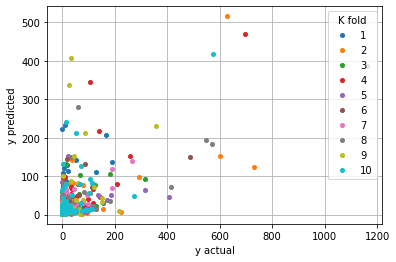

In [178]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [179]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [180]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['shoplifting'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     1.0  10.555869
1     E01015024     0.0   7.311170
2     E01015025     0.0   3.085797
3     E01015026     0.0   9.852997
4     E01015027    49.0  36.671083
...         ...     ...        ...
1029  E01033236     3.0   7.495849
1030  E01033289     2.0   4.630532
1031  E01033291     9.0   4.032805
1032  E01033292    35.0  23.156583
1033  E01033294     8.0  12.490209

[1034 rows x 3 columns]

In [181]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_shoplifting.csv')

## Theft from the person

In [182]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['theft_person'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [183]:
initial = initial_rf_regression(X,y)

In [184]:
initial[0:2]

(2.414686615974352, 5.835901867953391)

With a mean theft from the person value of 2.6, this initial random forest test RMSE is very high. And the R squared:

In [185]:
initial[2:4]

(0.9296754429041677, 0.4495211672092996)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [186]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
flat                    0.368443  0.272324  0.317833  0.411617  0.258228   
two_plus_cars           0.226027  0.142407  0.163150  0.130264  0.203628   
room_rating             0.034507  0.154266  0.095269  0.061575  0.069302   
new_eu_birth            0.010430  0.035989  0.021260  0.019398  0.016413   
idaopi                  0.008518  0.018433  0.017001  0.005988  0.010461   
british_birth           0.005742  0.000359  0.002654  0.007576  0.000551   
semi_detached           0.007661  0.013456  0.007025  0.015971  0.009668   
non_dependent_children  0.006700  0.003852  0.011582  0.018715  0.022535   
married                 0.007440  0.001867  0.006795  0.010938  0.008464   
m_32                    0.003279  0.007307  0.010560  0.007310  0.009632   
f_48                    0.002910  0.005895  0.008833  0.006544  0.020025   
chinese                 0.006023  0.001492  0.001911  0.004529  0.000418   
education               0.001684  0.005528  0.004896  0.003173  0.009783   
full_time               0.007752  0.005002  0.005468  0.001573  0.001155   
m_26                    0.000584  0.005184  0.004058  0.005514  0.015609   
m_27                    0.000753  0.000161  0.000754  0.001368  0.001361   
private_transport       0.002542  0.006220  0.002954  0.007842  0.003846   
illness                 0.003974  0.005569  0.004775  0.003153  0.003632   
m_35                    0.003125  0.002774  0.001420  0.000199  0.010209   
geographical_barriers   0.015281  0.000999  0.001157  0.002973  0.003256   
storage                 0.004980  0.002745  0.001689  0.001631  0.002581   
hospitality             0.005228  0.001570  0.003369  0.007935  0.001264   
m_33                    0.002242  0.001106  0.005876  0.000475  0.001259   
alternative_transport   0.006700  0.002362  0.004683  0.004826  0.003999   
f_47                    0.000465  0.014314  0.007884  0.001109  0.000698   
m_18                    0.008108  0.003097  0.006189  0.001337  0.004337   
construction            0.000950  0.006577  0.000413  0.002718  0.003562   
private_rent            0.002696  0.002165  0.003763  0.002959  0.004265   
m_45                    0.001199  0.003437  0.004109  0.001432  0.002774   
f_26                    0.000153  0.002850  0.002800  0.000918  0.006591   

                         split_6   split_7   split_8   split_9  split_10  \
flat                    0.368730  0.389675  0.279440  0.262315  0.429439   
two_plus_cars           0.157865  0.110244  0.168351  0.205579  0.108056   
room_rating             0.042082  0.059066  0.072022  0.073882  0.058761   
new_eu_birth            0.003000  0.020653  0.001168  0.016644  0.018174   
idaopi                  0.005901  0.008635  0.007141  0.016967  0.020576   
british_birth           0.028112  0.010234  0.018125  0.023583  0.011404   
semi_detached           0.008395  0.014343  0.011272  0.007085  0.008856   
non_dependent_children  0.015533  0.007887  0.007929  0.003817  0.002542   
married                 0.004594  0.019733  0.016674  0.005881  0.012080   
m_32                    0.006540  0.007758  0.000434  0.016794  0.004884   
f_48                    0.008135  0.003985  0.002679  0.007702  0.001630   
chinese                 0.019968  0.001943  0.023318  0.000598  0.004890   
education               0.008496  0.005109  0.002148  0.003032  0.012848   
full_time               0.009630  0.006399  0.007364  0.003863  0.007410   
m_26                    0.006606  0.007031  0.000824  0.007760  0.002345   
m_27                    0.006135  0.013853  0.008449  0.000597  0.014863   
private_transport       0.002471  0.004124  0.005491  0.008134  0.002098   
illness                 0.004295  0.006016  0.007066  0.001988  0.004999   
m_35                    0.000965  0.000862  0.007301  0.010310  0.006468   
geographical_barriers   0.002879  0.005239  0.000577  0.006118  0.002156   
storage                 0.006167  0.008593  0.002687  0.000756  0.008396

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [187]:
top_features = top_30_features(initial)

In [188]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('theft_person')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('theft_person',axis=1) 
y_df = feature_selected['theft_person'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [189]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.5min finished


{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 110,
 'bootstrap': False}

In [190]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(1.3477553349160982, 5.236950304203165)

Both RMSEs have been reduced. And R squared:

In [191]:
best[2:4]

(0.9779340227612836, 0.5658565649887541)

Both have increased.

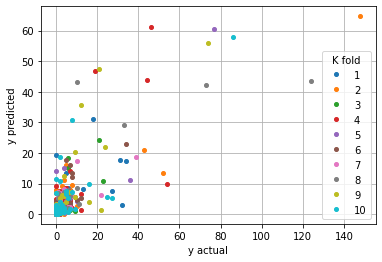

In [192]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [193]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [194]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['theft_person'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023     5.0   4.610278
1     E01015024     1.0   1.045000
2     E01015025     2.0   1.873333
3     E01015026     1.0   1.175000
4     E01015027     2.0   1.845556
...         ...     ...        ...
1029  E01033236     0.0   0.302500
1030  E01033289     2.0   2.085278
1031  E01033291     3.0   2.506667
1032  E01033292     1.0   1.088056
1033  E01033294     0.0   0.173889

[1034 rows x 3 columns]

In [195]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_theft_person.csv')

## Vehicle crime

In [196]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['vehicle_crime'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [197]:
initial = initial_rf_regression(X,y)

In [198]:
initial[0:2]

(3.5950545673296737, 9.525380902549845)

With a mean vehicle crime value of 15.2, this initial random forest test RMSE is high. And the R squared:

In [199]:
initial[2:4]

(0.9142187320252033, 0.3843750799847146)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [200]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5   split_6  \
outdoors_score  0.149853  0.109305  0.081649  0.078566  0.092477  0.101918   
british_birth   0.059857  0.068398  0.096435  0.073060  0.105195  0.083633   
private_rent    0.046201  0.045005  0.044524  0.093989  0.047438  0.052408   
new_eu_birth    0.035360  0.063587  0.044473  0.023114  0.039404  0.022415   
white           0.026204  0.028394  0.024484  0.028925  0.028372  0.017078   
agriculture     0.013691  0.014580  0.037353  0.019214  0.018206  0.025069   
flat            0.017030  0.014133  0.010389  0.023471  0.012065  0.009648   
single          0.008412  0.035808  0.006329  0.011740  0.017432  0.018241   
wider_barriers  0.008998  0.009960  0.012720  0.013577  0.006275  0.017983   
room_rating     0.006440  0.009493  0.007368  0.015566  0.010631  0.008568   
married         0.010427  0.013783  0.010161  0.006241  0.014077  0.010786   
m_32            0.006069  0.003727  0.014476  0.010387  0.004431  0.011597   
m_16            0.006795  0.013571  0.005668  0.009800  0.006884  0.005275   
detached        0.004942  0.005535  0.004777  0.003033  0.015277  0.007777   
chinese         0.008761  0.007493  0.009791  0.008656  0.005852  0.009168   
m_18            0.010718  0.007215  0.004863  0.005059  0.008881  0.003569   
m_36            0.005726  0.007182  0.006071  0.007347  0.005013  0.005449   
health_score    0.003725  0.003892  0.008489  0.006296  0.011913  0.006073   
finance         0.008274  0.005474  0.005663  0.006209  0.007354  0.006196   
energy          0.009438  0.005356  0.006962  0.005625  0.006602  0.006373   
people_sq_km    0.008636  0.002576  0.004861  0.007221  0.004591  0.006590   
bangladeshi     0.006831  0.006018  0.008027  0.005100  0.007680  0.004502   
illness         0.007560  0.006535  0.005641  0.006140  0.005828  0.005240   
communal        0.005459  0.004285  0.006597  0.003667  0.005941  0.005419   
m_55            0.004676  0.004273  0.005557  0.004264  0.002945  0.006767   
f_28            0.003354  0.005707  0.008084  0.004628  0.005854  0.007537   
m_33            0.003772  0.004209  0.005046  0.001441  0.005182  0.008836   
m_25            0.003094  0.004926  0.007001  0.002477  0.004669  0.011445   
black           0.005166  0.003835  0.002792  0.012223  0.002042  0.003057   
health          0.004659  0.006749  0.004542  0.003830  0.003822  0.005008   

                 split_7   split_8   split_9  split_10      mean  
outdoors_score  0.112021  0.096017  0.104221  0.101961  0.102799  
british_birth   0.096021  0.106453  0.123539  0.059468  0.087206  
private_rent    0.063489  0.056366  0.041574  0.083322  0.057432  
new_eu_birth    0.015413  0.023143  0.029890  0.026894  0.032369  
white           0.037826  0.020696  0.019566  0.011610  0.024315  
agriculture     0.012527  0.019732  0.017257  0.014966  0.019259  
flat            0.020931  0.024021  0.014009  0.018732  0.016443  
single          0.011351  0.012408  0.005136  0.008934  0.013579  
wider_barriers  0.008798  0.015927  0.013394  0.015395  0.012303  
room_rating     0.010711  0.009611  0.020962  0.012361  0.011171  
married         0.007453  0.005177  0.009753  0.020688  0.010855  
m_32            0.006392  0.011216  0.009437  0.011341  0.008907  
m_16            0.009736  0.005997  0.010853  0.009669  0.008425  
detached        0.007004  0.006474  0.008932  0.013615  0.007736  
chinese         0.006892  0.009820  0.004585  0.004729  0.007575  
m_18            0.006645  0.008866  0.005062  0.009667  0.007054  
m_36            0.011146  0.007183  0.005848  0.004960  0.006593  
health_score    0.004962  0.006988  0.004482  0.007392  0.006421  
finance         0.006938  0.005888  0.007983  0.003543  0.006352  
energy          0.005227  0.004752  0.006456  0.005228  0.006202  
people_sq_km    0.005527  0.005613  0.008982  0.006978  0.006157  
bangladeshi     0.007206  0.006671  0.002415  0.006569  0.006102  
illness         0.006529  0.008284  0.006008  0.001947  0

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [201]:
top_features = top_30_features(initial)

In [202]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('vehicle_crime')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('vehicle_crime',axis=1) 
y_df = feature_selected['vehicle_crime'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [203]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.9min
/home/megan/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.0min finished


{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': True}

In [204]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(4.245940443240461, 9.437257484710603)

The test RMSE has been reduced. And R squared:

In [205]:
best[2:4]

(0.8803568724906237, 0.3959768794077278)

The test value has increased.

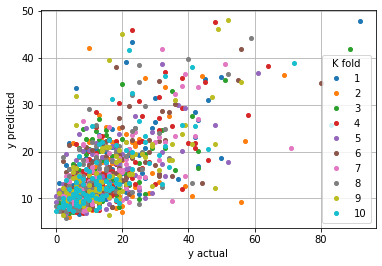

In [206]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [207]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [208]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['vehicle_crime'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023    40.0  30.981562
1     E01015024     7.0  11.875244
2     E01015025    14.0  15.925506
3     E01015026    27.0  25.106498
4     E01015027    14.0  16.841186
...         ...     ...        ...
1029  E01033236     6.0   9.533776
1030  E01033289    11.0  10.932301
1031  E01033291     9.0   7.917028
1032  E01033292    13.0  13.730654
1033  E01033294     8.0  12.484794

[1034 rows x 3 columns]

In [209]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_vehicle_crime.csv')

## Violence and sexual offences

In [210]:
# Separate features from labels
X_df = devon_cornwall.drop(['antisocial','bike_theft','burglary','damage_arson','drugs','other_crime','other_theft',
                        'possession_weapons','public_order','robbery','shoplifting','theft_person','vehicle_crime',
                        'violence_sexual', 'crime_total'],axis=1) 
y_df = devon_cornwall['violence_sexual'] 

# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [211]:
initial = initial_rf_regression(X,y)

In [212]:
initial[0:2]

(32.23221646355373, 79.13571682411842)

With a mean violence and sexual offences value of 133, this initial random forest test RMSE is high. And the R squared:

In [213]:
initial[2:4]

(0.952039662897203, 0.6705677482496807)

Let's perform some feature selection and adjust the hyper-parameters. Let's have a look at the most important features:

In [214]:
initial[4].head(30)

split_1   split_2   split_3   split_4   split_5  \
two_plus_cars          0.281397  0.199977  0.265335  0.203553  0.292950   
flat                   0.148533  0.113162  0.132403  0.166728  0.086322   
owners                 0.104238  0.129749  0.112607  0.117269  0.091908   
married                0.052205  0.033728  0.035058  0.044645  0.058713   
room_rating            0.026143  0.083667  0.056796  0.059437  0.045492   
health_score           0.019037  0.044122  0.011741  0.027655  0.017148   
employment_score       0.014691  0.014756  0.009146  0.008498  0.013370   
single                 0.010846  0.012750  0.005256  0.009029  0.007464   
wider_barriers         0.004391  0.007561  0.010877  0.001713  0.008370   
imd                    0.008861  0.006650  0.009443  0.004962  0.006896   
semi_detached          0.004054  0.002351  0.003060  0.014333  0.005368   
new_eu_birth           0.001951  0.014327  0.002847  0.007483  0.001644   
f_48                   0.000470  0.017756  0.008649  0.002730  0.007034   
part_time              0.007928  0.003512  0.010868  0.008671  0.005719   
m_31                   0.004851  0.001632  0.002083  0.005900  0.004614   
income_score           0.003604  0.010672  0.005904  0.005903  0.004201   
f_47                   0.001724  0.006331  0.004917  0.004255  0.005464   
m_29                   0.004242  0.002901  0.003142  0.004106  0.009068   
m_32                   0.006017  0.007053  0.007053  0.003781  0.001647   
m_2                    0.005670  0.003149  0.009770  0.003741  0.003767   
full_time              0.006484  0.003328  0.003046  0.005518  0.005807   
terrace                0.000511  0.007270  0.003879  0.003164  0.007150   
m_all_ages             0.005271  0.005405  0.003860  0.003095  0.005568   
idaopi                 0.004245  0.003955  0.004045  0.003098  0.002740   
education              0.002974  0.003105  0.002731  0.004276  0.005080   
m_33                   0.002878  0.004449  0.004141  0.002439  0.008025   
private_transport      0.000576  0.001059  0.006379  0.004529  0.001866   
alternative_transport  0.004391  0.001398  0.002845  0.001078  0.005718   
geographical_barriers  0.005458  0.001284  0.001263  0.001921  0.002838   
bangladeshi            0.006161  0.001875  0.003750  0.003987  0.006797   

                        split_6   split_7   split_8   split_9  split_10  \
two_plus_cars          0.300925  0.224560  0.231267  0.267259  0.267965   
flat                   0.132803  0.213747  0.158590  0.114424  0.158105   
owners                 0.098761  0.094022  0.110749  0.119770  0.086873   
married                0.037480  0.052544  0.053390  0.041651  0.058508   
room_rating            0.030635  0.021828  0.044672  0.028482  0.029039   
health_score           0.017824  0.013217  0.021559  0.020833  0.019617   
employment_score       0.013186  0.009354  0.014115  0.009054  0.014541   
single                 0.017189  0.011632  0.010858  0.009828  0.005216   
wider_barriers         0.004490  0.003698  0.011094  0.017436  0.008681   
imd                    0.007548  0.004275  0.007575  0.005640  0.007840   
semi_detached          0.007427  0.005911  0.008359  0.006124  0.004311   
new_eu_birth           0.001899  0.008997  0.004842  0.006442  0.004683   
f_48                   0.004145  0.005204  0.001733  0.002661  0.003739   
part_time              0.003415  0.004786  0.004851  0.000777  0.001790   
m_31                   0.010888  0.003420  0.004958  0.004344  0.008508   
income_score           0.003606  0.005018  0.004948  0.003663  0.003353   
f_47                   0.005833  0.006903  0.003909  0.002146  0.009352   
m_29                   0.004196  0.007737  0.002234  0.009625  0.003212   
m_32                   0.004860  0.011250  0.000659  0.004640  0.002603   
m_2                    0.005521  0.002105  0.004833  0.003613  0.005688   
full_time              0.005220  0.007396  0.001906  0.005548  0.002541   
terrace                0.008957  0.003949  0.001

Let's use the top 30 again and do a random search to adjust the hyper-parameters.

In [215]:
top_features = top_30_features(initial)

In [216]:
# Create a new dataframe of these top features and separate into X and y
top_features.append('violence_sexual')
feature_selected = devon_cornwall[top_features]
# Split data into two dataframes
X_df = feature_selected.drop('violence_sexual',axis=1) 
y_df = feature_selected['violence_sexual'] 
# Convert dataframes to NumPy arrays
X = X_df.values
y = y_df.values

In [217]:
best_parameters = random_search(random_grid, X, y)
best_parameters

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   43.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  7.3min finished


{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

In [218]:
best = best_rf_regression(X,y,best_parameters)
best[0:2]

(0.0, 72.83947228684235)

Both RMSEs have been reduced. And R squared:

In [219]:
best[2:4]

(1.0, 0.7167293070389056)

Both have increased.

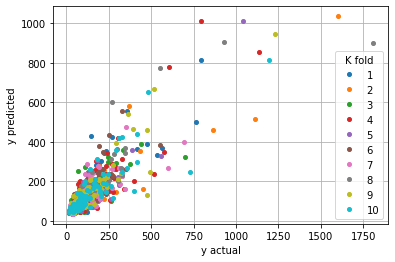

In [220]:
# Plot actual against predicted values
plot_actual_predicted(best)

In [221]:
# Apply final model to all data
y_pred = final_rfr(X, y, best_parameters)

In [222]:
# Make table of actual and predicted crime values
d = {'lsoa_code': devon_cornwall_lsoa['lsoa_code'], 
    'actual': devon_cornwall['violence_sexual'],
    'predicted': y_pred}
predictions = pd.DataFrame(d)
predictions

lsoa_code  actual  predicted
0     E01015023   283.0      283.0
1     E01015024   102.0      102.0
2     E01015025    80.0       80.0
3     E01015026   208.0      208.0
4     E01015027   134.0      134.0
...         ...     ...        ...
1029  E01033236    40.0       40.0
1030  E01033289    81.0       81.0
1031  E01033291   157.0      157.0
1032  E01033292   185.0      185.0
1033  E01033294   119.0      119.0

[1034 rows x 3 columns]

In [223]:
# Save dataframe to CSV file
predictions.to_csv('./predictions/rfr_violence_sexual.csv')